# 简介

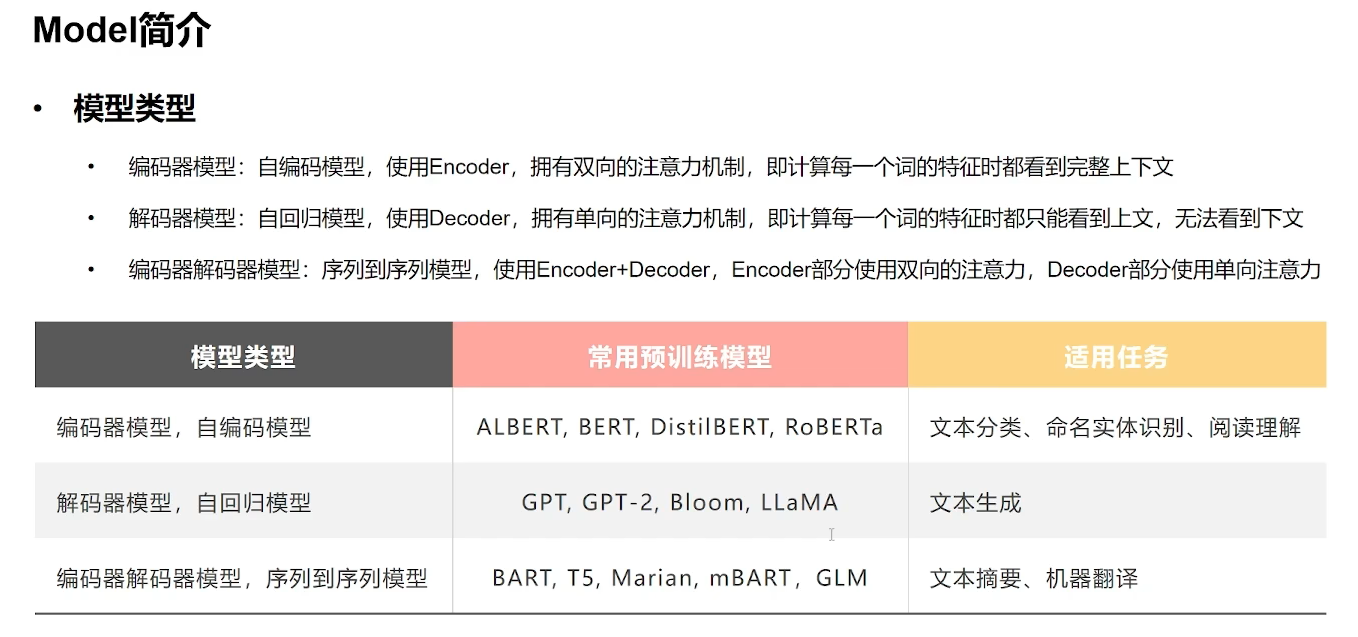

## Model Head

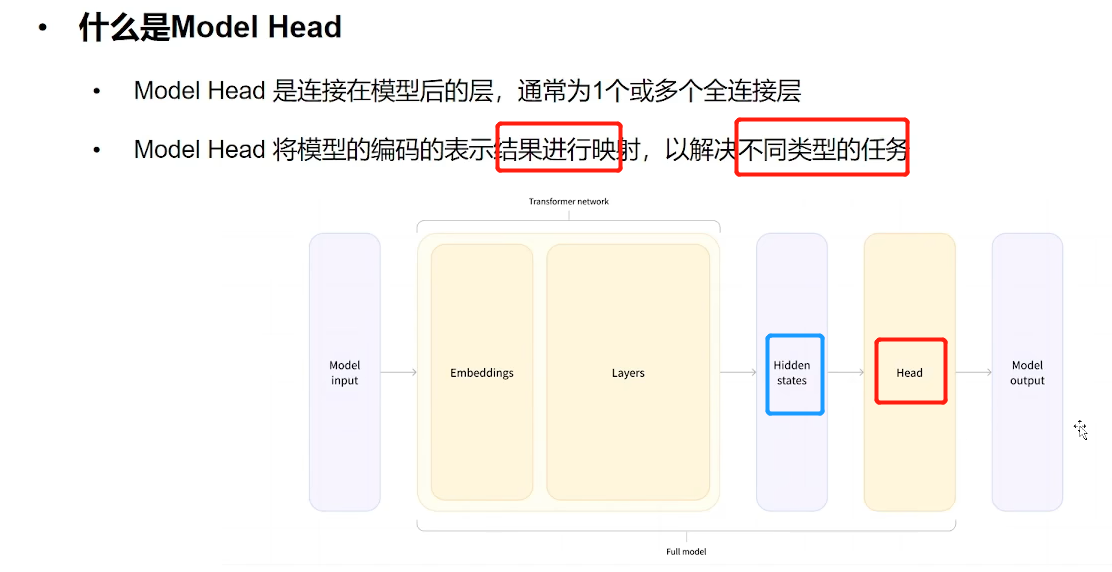

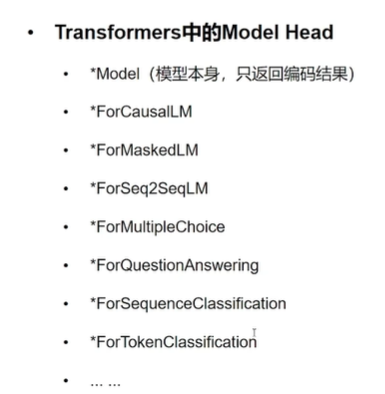

# 模型加载与保存

In [1]:
from transformers import AutoConfig, AutoModel, AutoTokenizer

/data1/zhengnanyan/miniconda3/envs/LLMpython39/lib/python3.9/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


## 在线加载

配置bashrc：

设置缓存

export HF_HOME=/your_path/your_path/huggingface

export TRANSFORMERS_CACHE=/your_path/your_path/huggingface

设置hf镜像

export HF_ENDPOINT=https://hf-mirror.com


In [2]:
model = AutoModel.from_pretrained("hfl/rbt3", force_download=True)

config.json:   0%|          | 0.00/404 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/404 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/156M [00:00<?, ?B/s]

## 模型下载（需要科学）

In [ ]:
!git clone "https://huggingface.co/hfl/rbt3"

In [ ]:
# 只下载pytorch模型，通过git仓库下载
!git lfs clone "https://huggingface.co/hfl/rbt3" --include="*.bin"

## 离线加载

In [5]:
model = AutoModel.from_pretrained("rbt3")

## 模型加载参数

In [4]:
model = AutoModel.from_pretrained("hfl/rbt3")

In [5]:
model.config

BertConfig {
  "_name_or_path": "hfl/rbt3",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 3,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

- AutoConfig

In [8]:
config = AutoConfig.from_pretrained("hfl//rbt3/")
config

BertConfig {
  "_name_or_path": "./rbt3/",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 3,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.36.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

In [9]:
config.output_attentions

False

# 模型调用

In [2]:
sen = "弱小的我也有大梦想！"
tokenizer = AutoTokenizer.from_pretrained("hfl/rbt3")
inputs = tokenizer(sen, return_tensors="pt")
inputs

{'input_ids': tensor([[ 101, 2483, 2207, 4638, 2769,  738, 3300, 1920, 3457, 2682, 8013,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

## 不带Model Head的模型调用

In [12]:
model = AutoModel.from_pretrained("hfl/rbt3")
output = model(**inputs)
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.6804,  0.6664,  0.7170,  ..., -0.4102,  0.7839, -0.0262],
         [-0.7378, -0.2748,  0.5034,  ..., -0.1359, -0.4331, -0.5874],
         [-0.0212,  0.5642,  0.1032,  ..., -0.3617,  0.4646, -0.4747],
         ...,
         [ 0.0853,  0.6679, -0.1757,  ..., -0.0942,  0.4664,  0.2925],
         [ 0.3336,  0.3224, -0.3355,  ..., -0.3262,  0.2532, -0.2507],
         [ 0.6761,  0.6688,  0.7154,  ..., -0.4083,  0.7824, -0.0224]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-1.2646e-01, -9.8619e-01, -1.0000e+00, -9.8325e-01,  8.0238e-01,
         -6.6268e-02,  6.6918e-02,  1.4784e-01,  9.9451e-01,  9.9995e-01,
         -8.3051e-02, -1.0000e+00, -9.8865e-02,  9.9980e-01, -1.0000e+00,
          9.9993e-01,  9.8291e-01,  9.5363e-01, -9.9948e-01, -1.3219e-01,
         -9.9733e-01, -7.7934e-01,  1.0720e-01,  9.8040e-01,  9.9953e-01,
         -9.9939e-01, -9.9997e-01,  1.4967e-01, -8.7627e-01, -9.999

In [13]:
output.last_hidden_state.size()

torch.Size([1, 12, 768])

In [15]:
len(inputs["input_ids"][0])

12

In [ ]:
# 输出[1, 12, 768]：[batch, 句子长度， 隐藏层维度]

## 带Model Head的模型调用

In [3]:
from transformers import AutoModelForSequenceClassification

In [4]:
clz_model = AutoModelForSequenceClassification.from_pretrained("hfl/rbt3")
clz_model(**inputs)
# output的logits=tensor([[ 0.0168, -0.3290]]，是二维

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at hfl/rbt3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SequenceClassifierOutput(loss=None, logits=tensor([[0.3992, 0.1718]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [5]:
clz_model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, e

- 带head就多了最后两层：

(dropout): Dropout(p=0.1, inplace=False)

(classifier): Linear(in_features=768, out_features=2, bias=True)

然后将隐藏层结果转化为：SequenceClassifierOutput

源码：

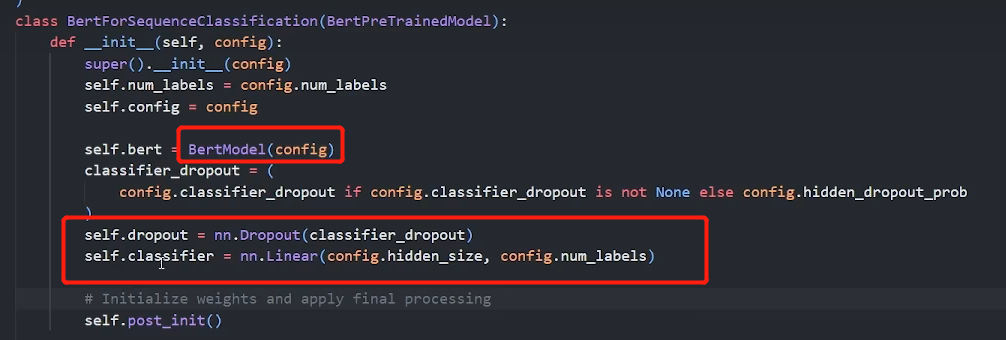


In [17]:
# output的logits维数可以自定义
clz_model = AutoModelForSequenceClassification.from_pretrained("hfl/rbt3", num_labels=10)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at rbt3 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
clz_model(**inputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-0.1485, -0.5152,  0.2111, -0.6348,  0.5859,  0.5790,  0.2845, -0.1190,
         -0.0265, -0.4940]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [19]:
clz_model.config.num_labels

10